#  Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## A Brief matplotlib API Primer

In [2]:
data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

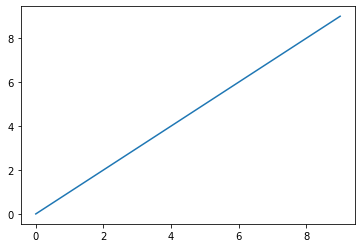

In [4]:
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure`:

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

`plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk.

In [6]:
fig = plt.figure(figsize=(50, 50))

<Figure size 3600x3600 with 0 Axes>

You can't make a plot with a blank figure. You have to create one or more subplots using `add_subplot`:

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1). 

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

**One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.**

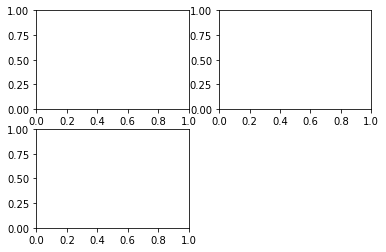

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

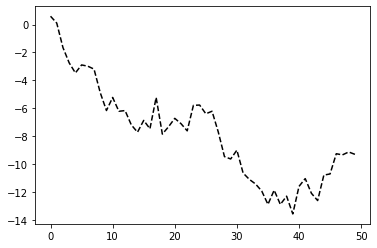

In [11]:
plt.plot(np.random.randn(50).cumsum(), "k--")

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the _**last figure and subplot used (creating one if necessary)**_, thus hiding the figure and subplot creation.

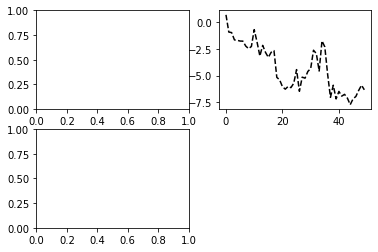

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
plt.plot(np.random.randn(50).cumsum(), "k--")
ax3 = fig.add_subplot(2, 2, 3)

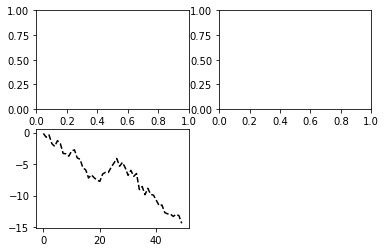

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), "k--")

The objects returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one's instance method:

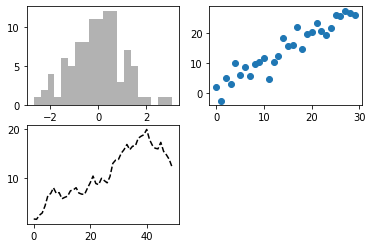

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), "k--")
_ = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Creating a figure with a _grid of subplots_ is a very common task, so matplotlib includes a convenience method, `plt.subplots`, that creates a new figure and returns a NumPy array containing the created subplot objects:

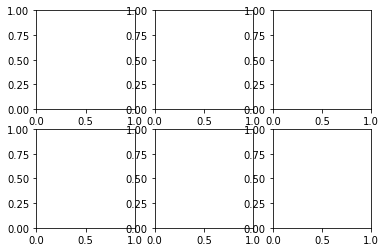

In [15]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, `axes[0, 1]`. You can also indicate that subplots should have the same x- or y-axis using `sharex` and `sharey`, respectively. This is especially useful when you're comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently.

![alt text](images/subplot.png "pyplot.subplots options")

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. 
You can change the spacing using the `subplots_adjust` method on `Figure` objects, also available as a top-level function:

```python
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```

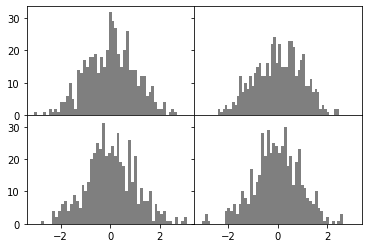

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

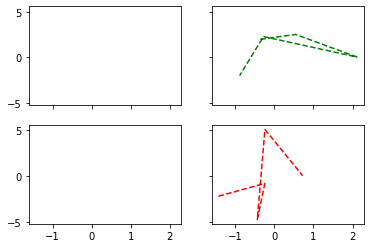

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0, 1].plot(np.random.randn(5), 2 * np.random.randn(5), linestyle="--", color="g")
axes[1, 1].plot(np.random.randn(5), 3 * np.random.randn(5), "r--")

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').
You can see the full set of line styles by looking at the docstring for plot (use plot? in IPython or Jupyter).

The marker can be part of the style string, which must have color followed by marker type and line style

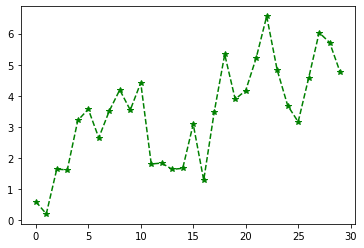

In [19]:
plt.plot(np.random.randn(30).cumsum(), "g*--")

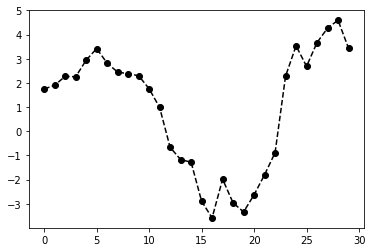

In [20]:
plt.plot(np.random.randn(30).cumsum(), color="k", linestyle="dashed", marker="o")

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the `drawstyle` option

In [21]:
data = np.random.randn(30).cumsum()

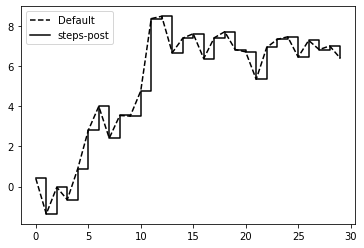

In [22]:
plt.plot(data, "k--", label="Default")
plt.plot(data, "k-", drawstyle="steps-post", label="steps-post")
plt.legend(loc="best")

## Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: 

* using the procedural `pyplot` interface (i.e., `matplotlib.pyplot`) 

* object-oriented native matplotlib API.

The `pyplot` interface, designed for interactive use, consists of methods like `xlim`, `xticks`, and `xticklabels`. They can be used in two ways:

* Called with no arguments returns the current parameter value (e.g., `plt.xlim()` returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., `plt.xlim([0, 10])`, sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created `AxesSubplot`. Each of them corresponds to two methods on the subplot object itself; in the case of `xlim` these are `ax.get_xlim` and `ax.set_xlim`. I prefer to use the subplot instance methods myself in the interest of being explicit (and especially when working with multiple subplots), but you can certainly use whichever you find more convenient.

### Setting the title, axis labels, ticks, and ticklabels

To change the `x-axis` ticks, it's easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using `set_xticklabels`.

The `rotation` option sets the x tick labels at a 30-degree rotation. Lastly, `set_xlabel` gives a name to the x-axis and `set_title` the subplot title:

Text(0.5, 0, 'Stages')

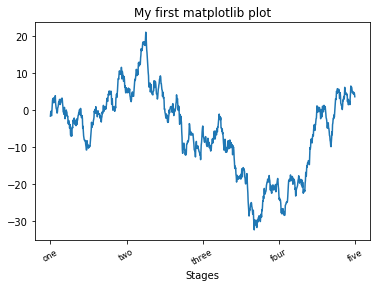

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize="small"
)
ax.set_title("My first matplotlib plot")
ax.set_xlabel("Stages")

The axes class has a `set` method that allows batch setting of plot properties. From the prior example, we could also have written:

In [24]:
props = {"title": "My first matplotlib plot", "xlabel": "Stages"}
ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 17.200000000000003, 'Stages')]

### Adding legends

There are a couple of ways to add one. The easiest is to pass the `label` argument when adding each piece of the plot. To exclude one or more elements from the legend, pass no label or `label='_nolegend_'`. Then, you can either call `ax.legend()` or `plt.legend()` to automatically create a legend. The resulting plot is in:

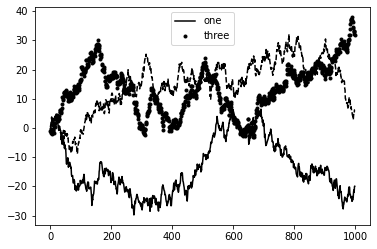

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), "k", label="one")
ax.plot(np.random.randn(1000).cumsum(), "k--", label="_nolegend_")
ax.plot(np.random.randn(1000).cumsum(), "k.", label="three")
ax.legend(loc="best")

### Annotations and Drawing on a Subplot

You can draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations
and text using the `text`, `arrow`, and `annotate` functions. `text` draws text at given coordinates (x, y) on the plot with optional custom styling:

Text(20, 30, 'Hello world!')

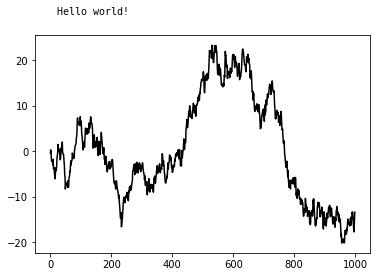

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), "k")
ax.text(20, 30, "Hello world!", family="monospace", fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

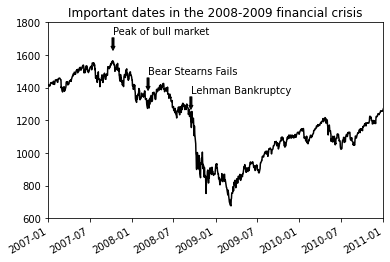

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv("data/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, style="k-")
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]
for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as *patches*. Some of these, like `Rectangle` and `Circle`, are found in `matplotlib.pyplot`, but the full set is located in `matplotlib.patches`.
To add a shape to a plot, you create the patch object `shp` and add it to a subplot by calling `ax.add_patch(shp)`

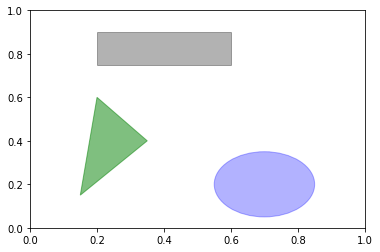

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="g", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

You can save the active figure to file using `plt.savefig`. This method is equivalent to the figure object's `savefig` instance method. The file type is inferred from the file extension. So if you used `.pdf` instead, you would get a PDF.

In [29]:
plt.savefig("figpath.svg")

<Figure size 432x288 with 0 Axes>

Here are a couple of important options that I use frequently for
publishing graphics: `dpi`, which controls the dots-per-inch resolution, and `bbox_inches`, which can trim the whitespace around the actual figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:

In [30]:
plt.savefig("figpath.png", dpi=400, bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

`savefig` doesn't have to write to disk; it can also write to any file-like object, such as a `BytesIO`:

In [31]:
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

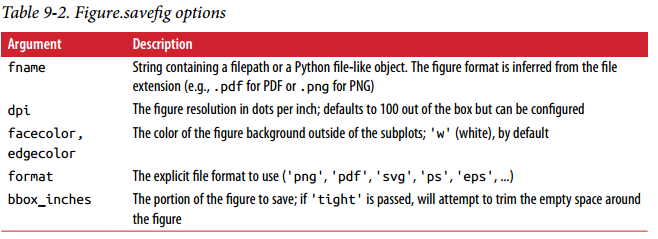

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. 

One way to modify the configuration programmatically from Python is to use the `rc` method; for example, to set the global default figure size to be 10 × 10, you could enter:

`plt.rc('figure', figsize=(10, 10))`

The first argument to `rc` is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. 

After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:

```python
font_options = {'family' : 'monospace',
'weight' : 'bold',
'size' : 'small'} 
plt.rc('font', **font_options)
```
For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file `matplotlibrc` in the `matplotlib/mpl-data` directory. If you customize this file and place it in your home directory titled `.matplotlibrc`, it will be loaded each time you use matplotlib.

As we'll see in the next section, the seaborn package has several built-in plot themes or styles that use matplotlib's configuration system internally.

### Plotting with pandas and seaborn

In matplotlib, you assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

pandas itself has built-in methods that simplify creating visualizations from Data‐Frame and Series objects. Another library is seaborn, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization
types.

Note: Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

### Line Plots

Series and DataFrame each have a `plot` attribute for making some basic plot types. 

By default, `plot()` makes line plots):

In [32]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [33]:
s

0    -0.547616
10   -0.574467
20   -0.347932
30    0.489779
40    0.422982
50   -1.018476
60    0.063729
70    0.404010
80   -0.388196
90   -1.830313
dtype: float64

<AxesSubplot:>

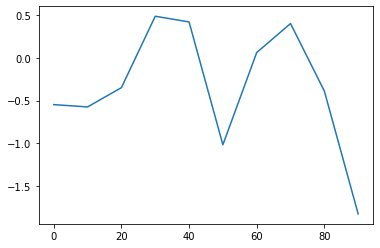

In [34]:
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing `use_index=False`. The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and y-axis respectively with `yticks` and `ylim`

<AxesSubplot:>

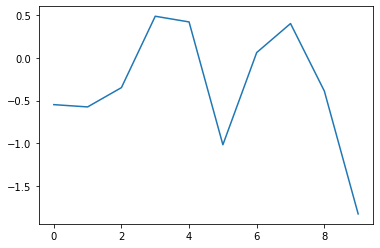

In [35]:
s.plot(use_index=False)

![alt text](images/seriesplot.png "Series.plot method arguments")

Most of pandas’s plotting methods accept an optional `ax` parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

DataFrame's `plot` method plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [36]:
np.random.seed(0)

In [37]:
df = pd.DataFrame(
    np.random.randint(0, 10, 40).reshape(10, 4).cumsum(0),
    columns=["A", "B", "C", "D"],
    index=np.arange(0, 100, 10),
)

In [38]:
df

,A,B,C,D
0,5,0,3,3
10,12,9,6,8
20,14,13,13,14
30,22,21,14,20
40,29,28,22,21
50,34,37,30,30
60,38,40,30,33
70,43,40,32,36
80,51,41,35,39
90,54,48,35,40


<AxesSubplot:>

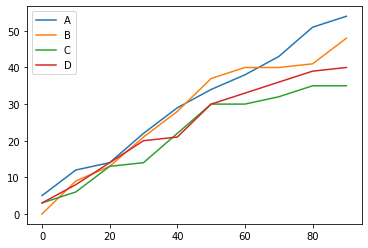

In [39]:
df.plot()

The plot attribute contains a “family” of methods for different plot types. For example, `df.plot()` is equivalent to `df.plot.line()`.

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.

![alt text](images/dataframeplot.png "Series.plot method arguments")

### Bar Plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots. The Series or DataFrame index will be used as the x (bar) or y (barh) ticks

In [40]:
data = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))

In [41]:
data

a    0.143353
b    0.944669
c    0.521848
d    0.414662
e    0.264556
f    0.774234
g    0.456150
h    0.568434
i    0.018790
j    0.617635
k    0.612096
l    0.616934
m    0.943748
n    0.681820
o    0.359508
p    0.437032
dtype: float64

<AxesSubplot:>

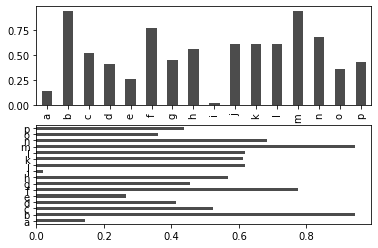

In [42]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color="k", alpha=0.7)
data.plot.barh(ax=axes[1], color="k", alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [43]:
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=["one", "two", "three", "four", "five", "six"],
    columns=pd.Index(["A", "B", "C", "D"], name="Genus"),
)

In [44]:
df

Genus,A,B,C,D
one,0.697631,0.060225,0.666767,0.670638
two,0.210383,0.128926,0.315428,0.363711
three,0.570197,0.438602,0.988374,0.102045
four,0.208877,0.161310,0.653108,0.253292
five,0.466311,0.244426,0.158970,0.110375
six,0.656330,0.138183,0.196582,0.368725


<AxesSubplot:>

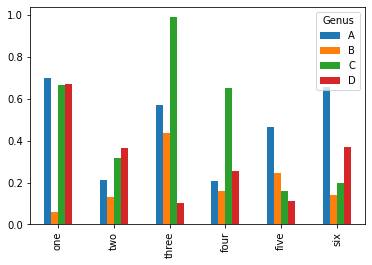

In [45]:
df.plot.bar()

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together 

<AxesSubplot:>

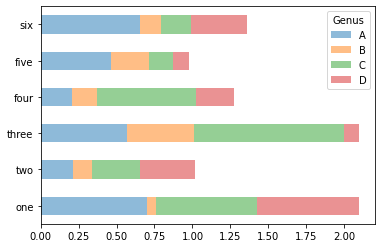

In [46]:
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for bar plots is to visualize a Series’s value frequency using value_counts: `s.value_counts().plot.bar()`

<AxesSubplot:>

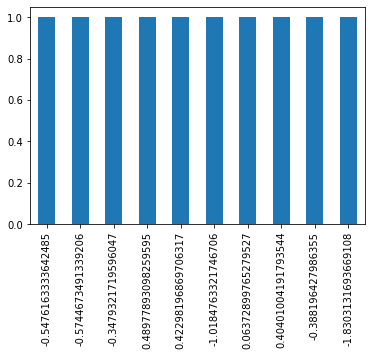

In [47]:
s.value_counts().plot.bar()

Using the tipping dataset, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using `read_csv` and make a cross-tabulation by day and party size:

In [48]:
tips = pd.read_csv("data/tips.csv")
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [49]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [50]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

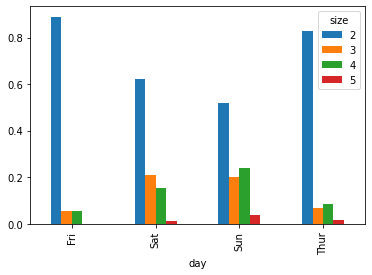

In [51]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler. Let’s look now at the tipping percentage by day with seaborn:

In [52]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

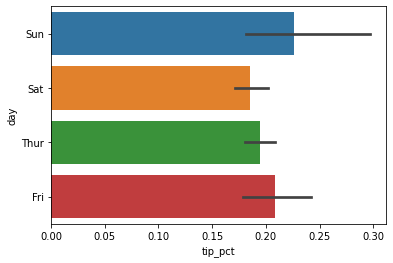

In [53]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

seaborn.barplot has a `hue` option that enables us to split by an additional categorical value:

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

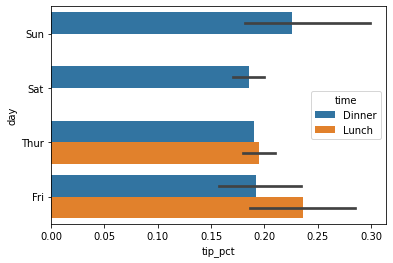

In [54]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

You can switch between different plot appearances using `seaborn.set`:

In [55]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

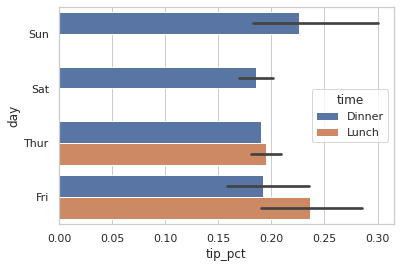

In [56]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

<AxesSubplot:ylabel='Frequency'>

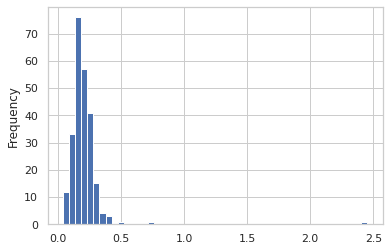

In [58]:
tips["tip_pct"].plot.hist(bins=50)

A related plot type is a *density plot*, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using `plot.kde` makes a density plot using the conventional mixture-of-normals estimate

<AxesSubplot:ylabel='Density'>

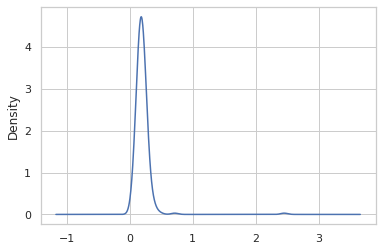

In [59]:
tips["tip_pct"].plot.density()

Seaborn makes histograms and density plots even easier through its `distplot` method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from
two different standard normal distributions 

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

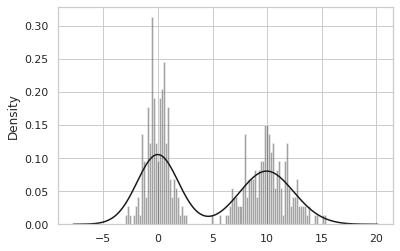

In [63]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color="k")

### Scatter or Point Plots

useful way of examining the relationship between two one-dimensional data series.

In [66]:
macro = pd.read_csv("data/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn’s `regplot` method, which makes a scatter plot and fits a linear regression line 

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

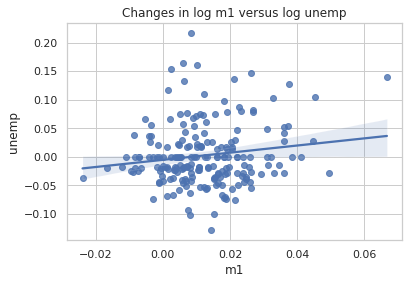

In [68]:
sns.regplot(x="m1", y="unemp", data=trans_data)
plt.title("Changes in log %s versus log %s" % ("m1", "unemp"))

It’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a **pairs plot** or **scatter plot** matrix. Making such a plot from scratch is a bit of work, so seaborn has a convenient `pairplot` function, which supports placing histograms or density estimates of each variable along the diagonal

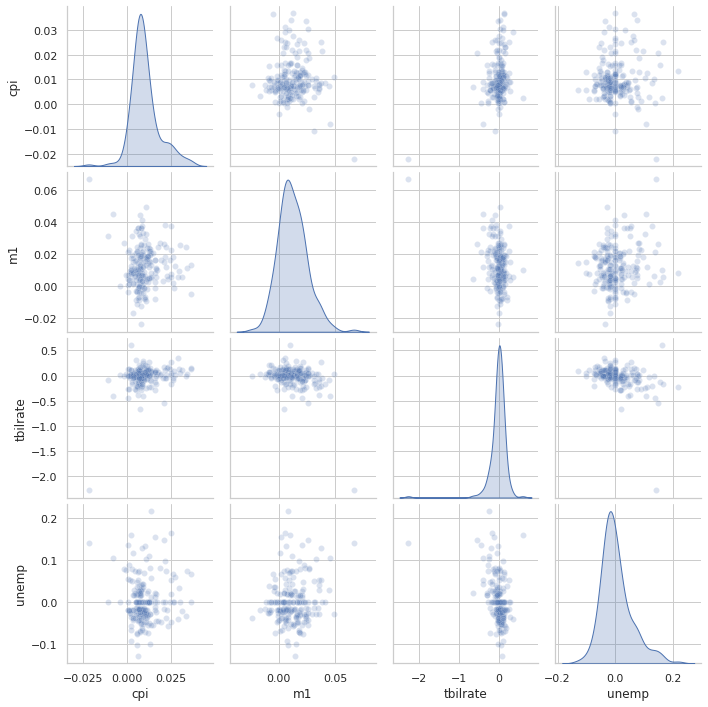

In [69]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

`plot_kws` argument enables us to pass down configuration
options to the individual plotting calls on the off-diagonal elements. 

### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a f**acet grid**. 
Seaborn has a useful
built-in function `catplot` that simplifies making many kinds of faceted plots:

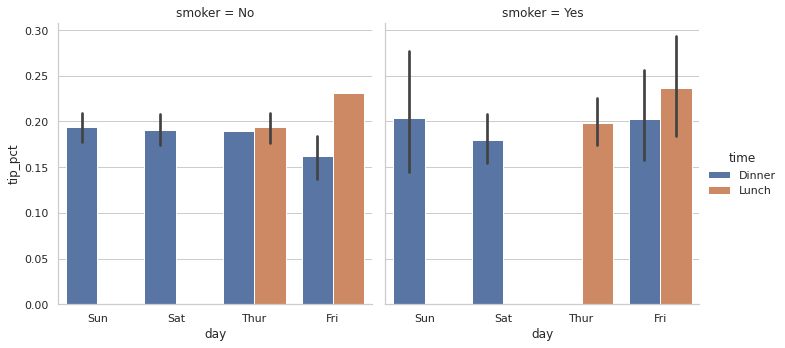

In [74]:
sns.catplot(
    x="day",
    y="tip_pct",
    hue="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1],
)

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per `time` value

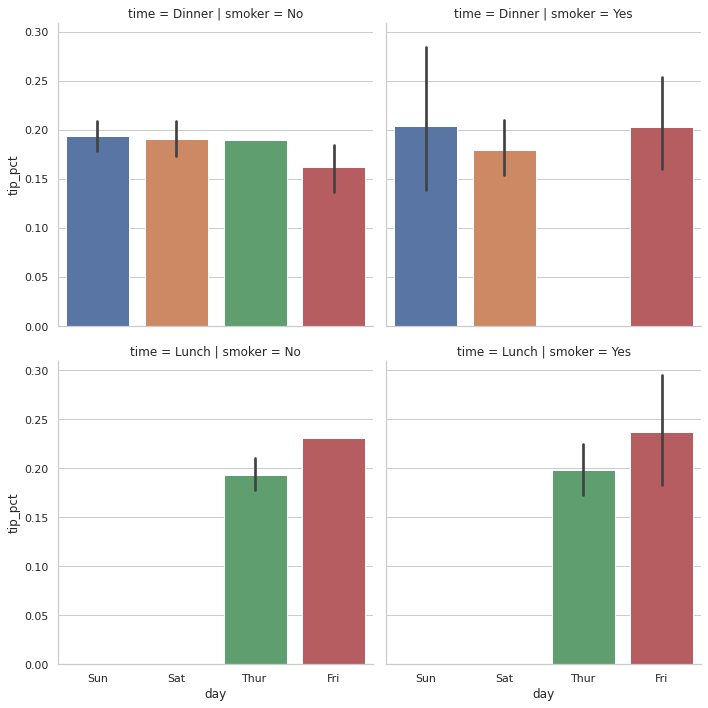

In [75]:
sns.catplot(
    x="day",
    y="tip_pct",
    row="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1],
)

`catplot` supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type:

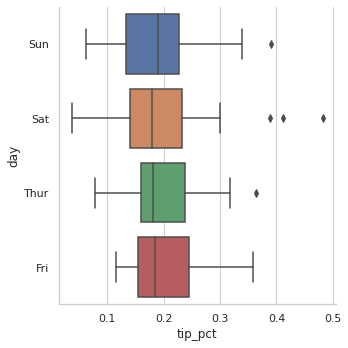

In [77]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general `seaborn.FacetGrid` class. 

### Other Python Visualization Tools

With tools like **Bokeh** and **Plotly**, it's now possible to specify dynamic, interactive graphics in Python that are
destined for a web browser.